Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [3]:
import mysql.connector
from mysql.connector import errorcode

try:
  cnx = mysql.connector.connect(user='root',
                                password = 'Casilda20@',
                                database='ventas')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)


In [4]:
# Visualización con Seaborn
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [5]:
# Carga de tablas:
# Consulta para extraer los datos de las tablas:
query_companies = "SELECT * FROM companies"
query_credit_cards = "SELECT * FROM credit_cards"
query_credit_cards_estado = "SELECT * FROM credit_cards_estado"
query_products = "SELECT * FROM products"
query_transactions = "SELECT * FROM transactions"
query_transactions_products = "SELECT * FROM transactions_products"
query_users = "SELECT * FROM users"

# Cargar los datos en un DataFrame de Pandas
try:
    df_companies = pd.read_sql(query_companies, cnx)
    df_credit_cards = pd.read_sql(query_credit_cards, cnx)
    df_credit_cards_estado = pd.read_sql(query_credit_cards_estado, cnx)
    df_products = pd.read_sql(query_products, cnx)
    df_transactions = pd.read_sql(query_transactions, cnx)
    df_transactions_products = pd.read_sql(query_transactions_products, cnx)
    df_users = pd.read_sql(query_users, cnx)
    print("Datos cargados exitosamente:")
except mysql.connector.Error as e:
    print(f"Error al cargar los datos: {e}")
finally:
    cnx.close()


C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\986797543.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(query_companies, cnx)
C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\986797543.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_credit_cards = pd.read_sql(query_credit_cards, cnx)
C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\986797543.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_credit_cards_estado = pd.read_sql(query_credit_cards_estado, cnx)
C:\Users\An

Datos cargados exitosamente:


C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\986797543.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions_products = pd.read_sql(query_transactions_products, cnx)
C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\986797543.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql(query_users, cnx)


In [6]:
# Unir las tablas con merge para tener una bbdd única de Ventas
df_credit_tot = pd.merge(df_credit_cards, df_credit_cards_estado, left_on='id', right_on='id', how='left')
df_transactions_tot = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='id', how='left')
df_transactions_prod_tot = pd.merge(df_transactions_tot, df_products, left_on='product_id', right_on='id', how='left')
df_trans_prod_credit_tot = pd.merge(df_transactions_prod_tot, df_credit_tot, left_on='card_id', right_on='id', how='left')
df_users = df_users.rename(columns={'id': 'user_id'}) # Cambio el nombre del campo para que no se llame igual que otro campo en el merge
df_trans_prod_credit_user_tot = pd.merge(df_trans_prod_credit_tot, df_users, left_on='user_id', right_on='user_id', how='left')
df_ventas = pd.merge(df_trans_prod_credit_user_tot, df_companies, left_on='business_id', right_on='company_id', how='left')

df_ventas

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitud,...,country_x,city,postal_code,address,company_id,company_name,phone_y,email_y,country_y,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
3,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
4,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,...,Canada,Baddeck,B4R 5C5,"P.O. Box 306, 6953 At Street",b-2494,Malesuada PC,01 74 85 68 70,cras.lorem.lorem@outlook.com,Ireland,https://yahoo.com/fr\r
1453,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,...,Canada,Lourdes,B0R 4L1,6491 Cursus St.,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
1454,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd.",b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
1455,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd.",b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r


In [7]:
# Convertir de VARCHAR a DATETIME
df_ventas['birth_date'] = pd.to_datetime(df_ventas['birth_date'], format='%b %d, %Y')


In [8]:
# Convertir de VARCHAR a FLOAT
df_ventas["price"] = df_ventas["price"].str.replace("$", "", regex=False).astype(float)

In [40]:
df_products.style.background_gradient("coolwarm")

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.110000,#7c7c7c,1.000000,WH-4
1,2,Tarly Stark,9.240000,#919191,2.000000,WH-3
2,3,duel tourney Lannister,171.130000,#d8d8d8,1.500000,WH-2
3,4,warden south duel,71.890000,#111111,3.000000,WH-1
4,5,skywalker ewok,171.220000,#dbdbdb,3.200000,WH-0
5,6,dooku solo,136.600000,#c4c4c4,0.800000,WH--1
6,7,north of Casterly,63.330000,#b7b7b7,0.600000,WH--2
7,8,Winterfell,32.370000,#383838,1.400000,WH--3
8,9,Winterfell,76.400000,#b5b5b5,1.200000,WH--4
9,10,Karstark Dorne,119.520000,#f4f4f4,2.400000,WH--5


- Exercici 1
Una variable numèrica.

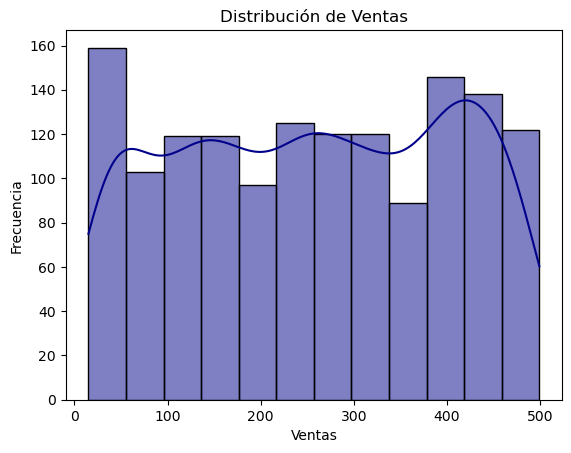

In [96]:
# Crear un histograma con KDE
sns.histplot(df_ventas['amount'], kde=True, color='darkblue')

# Título y ajustes
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

- Exercici 2
Dues variables numèriques.

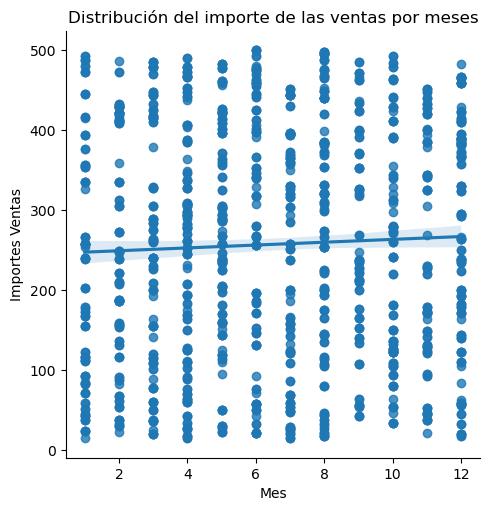

In [97]:
# Crear un gráfico con lmplot
df_ventas['month'] = df_ventas['timestamp'].dt.month
sns.lmplot(x='month', y='amount', data=df_ventas)

# Título y ajustes
plt.title('Distribución del importe de las ventas por meses')
plt.xlabel('Mes')
plt.ylabel('Importes Ventas')

# Mostrar el gráfico
plt.show()

- Exercici 3
Una variable categòrica.

C:\Users\Antonio\AppData\Local\Temp\ipykernel_13392\1754455623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='country', data=df_companies, palette="tab20")


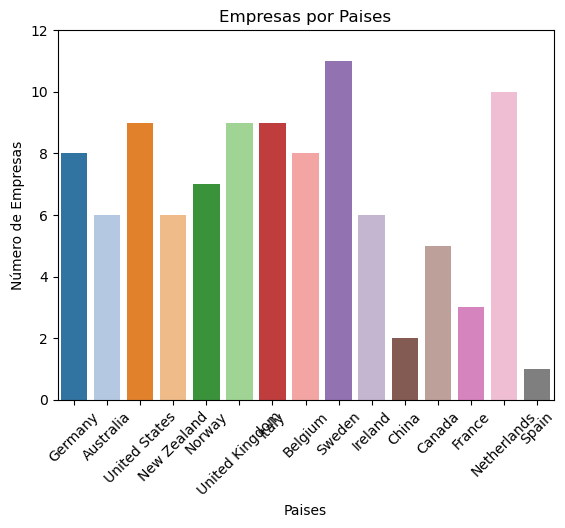

In [ ]:
# Crear un gráfico con countplot
sns.countplot(x='country', data=df_companies, palette="tab20")

# Título y ajustes
plt.title('Empresas por Paises')
plt.xlabel('Paises')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, fontsize=10)

# Mostrar el gráfico
plt.show()

- Exercici 4
Una variable categòrica i una numèrica.

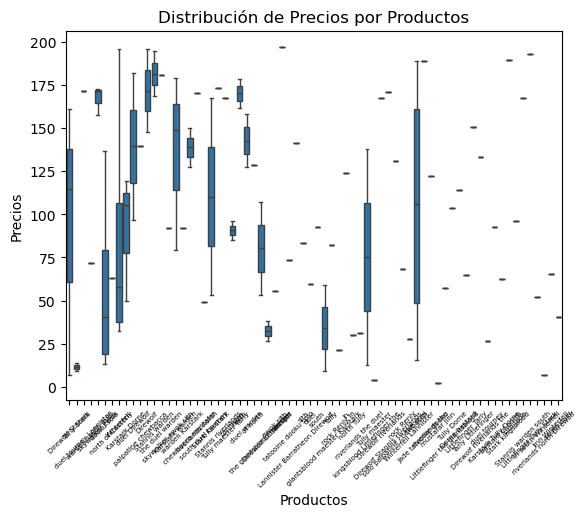

In [104]:
# Crear un boxplot
sns.boxplot(x='product_name', y='price', data=df_products)

# Título y ajustes
plt.title('Distribución de Precios por Productos')
plt.xlabel('Productos')
plt.ylabel('Precios')
plt.xticks(rotation=45, fontsize=5)

# Mostrar el gráfico
plt.show()

- Exercici 5
Dues variables categòriques.

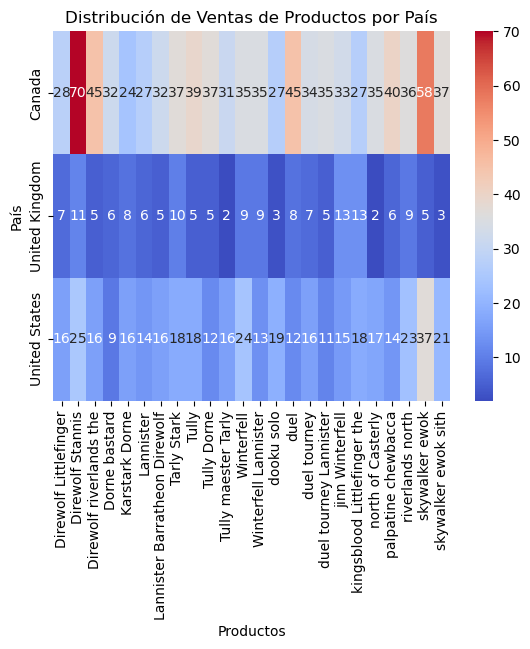

In [106]:
# Crear un heatmap
tabla = pd.crosstab(df_ventas['country_x'], df_ventas['product_name'])
sns.heatmap(tabla, annot=True, cmap='coolwarm', fmt='d')

# Título y ajustes
plt.title('Distribución de Ventas de Productos por País')
plt.xlabel('Productos')
plt.ylabel('País')

plt.show()

- Exercici 6
Tres variables.

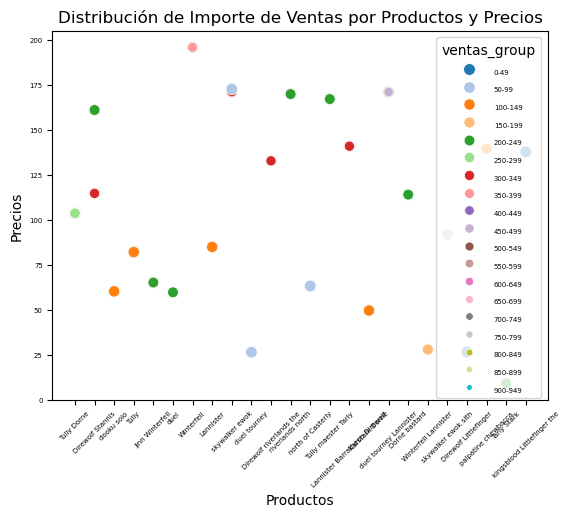

In [118]:
# Crear grupos de importes de ventas (rangos de 50)
bins = list(range(0, 1000, 50))  # Múltiplos de 50
labels = [f"{b}-{b+49}" for b in bins[:-1]]
df_ventas['ventas_group'] = pd.cut(df_ventas['amount'], bins=bins, labels=labels, right=False)

# Crear un scatterplot
ax = sns.scatterplot(data=df_ventas, x='product_name', y='price', hue='ventas_group', size='ventas_group', palette='tab20')

# Título y ajustes
plt.title('Distribución de Importe de Ventas por Productos y Precios')
plt.xlabel('Productos')
plt.ylabel('Precios')
plt.xticks(rotation=45, fontsize=5)
plt.yticks(fontsize=5)
plt.setp(ax.get_legend().get_texts(), fontsize=5)  # Cambia el tamaño de las etiquetas
plt.setp(ax.get_legend().get_title(), fontsize=10)  # Cambia el tamaño del título de la leyenda

plt.show()

- Exercici 7
Graficar un Pairplot.

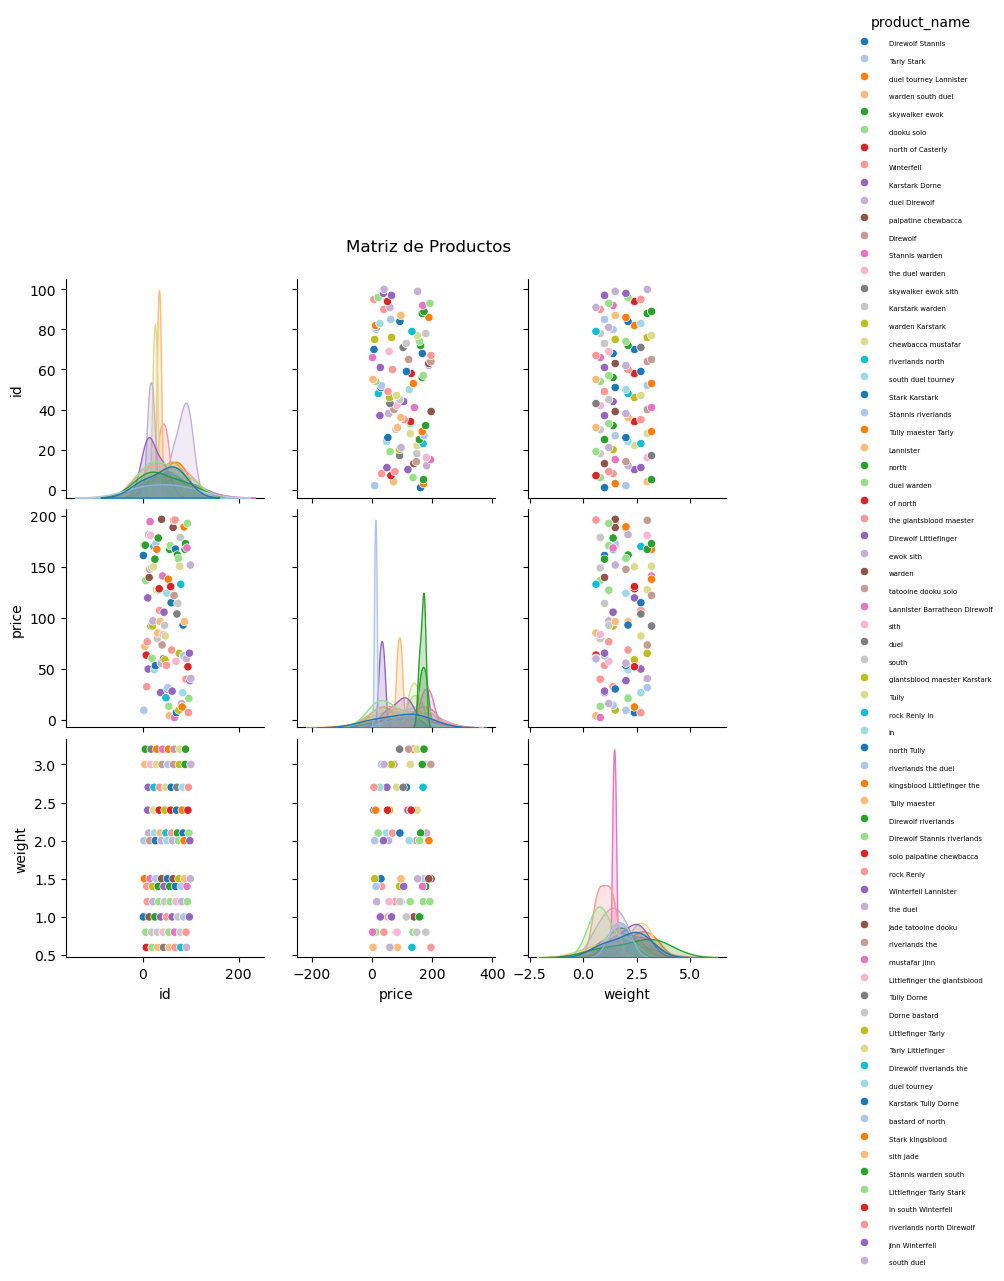

In [120]:
# Crear un pairplot
ax = sns.pairplot(df_products, hue="product_name", palette='tab20')

# Título y ajustes
plt.title('Matriz de Productos', fontsize=12, x=-0.5, y=3.2)
plt.setp(ax._legend.get_texts(), fontsize=5)  # Cambia el tamaño de las etiquetas
plt.setp(ax._legend.get_title(), fontsize=10)  # Cambia el tamaño del título de la leyenda

plt.show()

Nivell 2

Exercici 1
Correlació de totes les variables numèriques.

In [ ]:
# Crear una Correlations Matrix
df_ventas.select_dtypes(include = "number").corr().style.background_gradient("coolwarm")

,amount,declined,user_id,lat,longitud,product_id,id_y,price,weight,user_id_x,cvv,user_id_y,month
amount,1.000000,-0.027897,-0.059546,0.087361,0.035247,0.021217,0.021217,0.011335,-0.014904,-0.016648,-0.005686,-0.016648,0.041868
declined,-0.027897,1.000000,0.416928,-0.014352,0.008314,0.017397,0.017397,-0.009820,-0.008512,0.328808,-0.031273,0.328808,-0.028722
user_id,-0.059546,0.416928,1.000000,-0.023679,0.034738,-0.008688,-0.008688,-0.006800,-0.040744,0.029395,-0.167411,0.029395,-0.086825
lat,0.087361,-0.014352,-0.023679,1.000000,-0.003846,-0.004800,-0.004800,-0.012937,-0.006266,-0.030251,0.019695,-0.030251,0.015808
longitud,0.035247,0.008314,0.034738,-0.003846,1.000000,-0.030025,-0.030025,0.045304,-0.032691,0.021548,-0.077461,0.021548,0.042597
product_id,0.021217,0.017397,-0.008688,-0.004800,-0.030025,1.000000,1.000000,-0.021742,-0.026570,0.001651,0.030515,0.001651,0.023570
id_y,0.021217,0.017397,-0.008688,-0.004800,-0.030025,1.000000,1.000000,-0.021742,-0.026570,0.001651,0.030515,0.001651,0.023570
price,0.011335,-0.009820,-0.006800,-0.012937,0.045304,-0.021742,-0.021742,1.000000,0.194816,0.023537,0.036106,0.023537,-0.005256
weight,-0.014904,-0.008512,-0.040744,-0.006266,-0.032691,-0.026570,-0.026570,0.194816,1.000000,0.011616,-0.004407,0.011616,0.003160
user_id_x,-0.016648,0.328808,0.029395,-0.030251,0.021548,0.001651,0.001651,0.023537,0.011616,1.000000,0.098209,1.000000,-0.019578


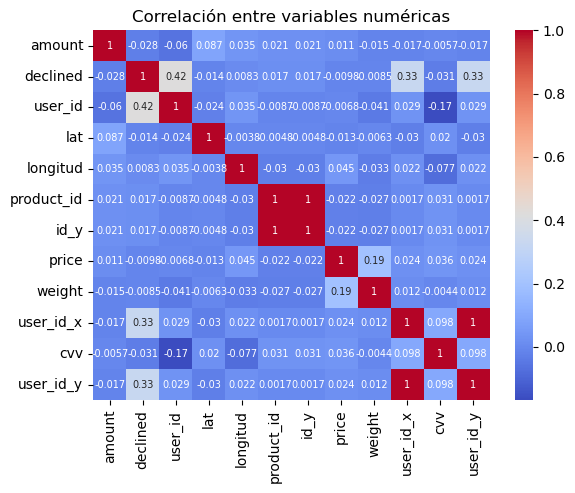

In [23]:
# Crear un gráfico con la Correlations Matrix
sns.heatmap(
    df_ventas.select_dtypes(include="number").corr(), 
    annot=True, 
    cmap="coolwarm", 
    annot_kws={"size": 7}  # Cambiar el tamaño de la fuente
)

# Título y ajustes
plt.title('Correlación entre variables numéricas')

plt.show()

Exercici 2
Implementa un jointplot.

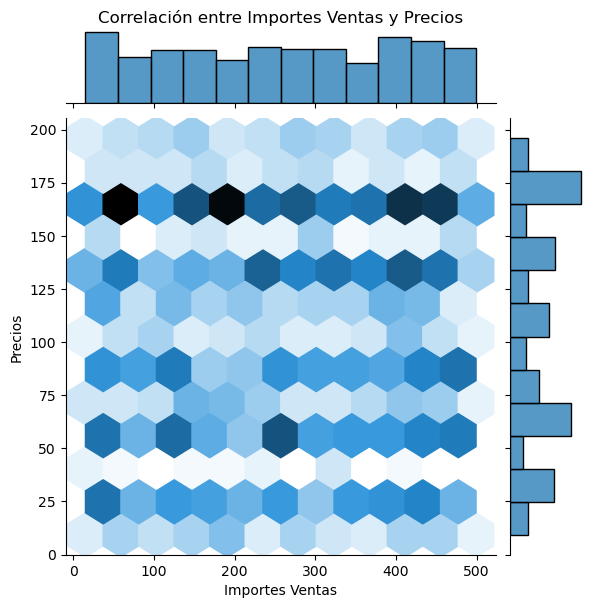

In [153]:
# Crear el gráfico JointPlot
sns.jointplot(x='amount', y='price', data=df_ventas, kind="hex", palette="tab20")

# Título y ajustes
plt.title('Correlación entre Importes Ventas y Precios', y=1.2)
plt.xlabel('Importes Ventas')
plt.ylabel('Precios')

plt.show()

Nivell 3

Exercici 1
Implementa un violinplot combinat amb un altre tipus de gràfic.

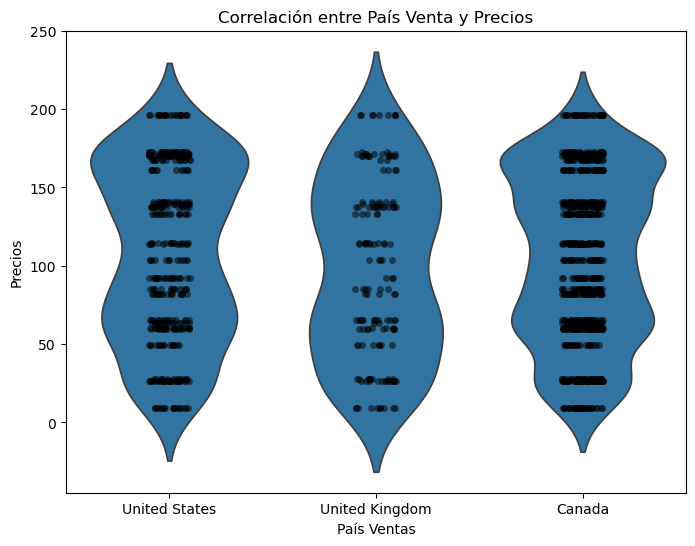

In [19]:
# Crear un gráfico ViolinPlot combinado con un Stripplot
plt.figure(figsize=(8, 6))
sns.violinplot(x='country_x', y='price', data=df_ventas, inner=None)
sns.stripplot(x='country_x', y='price', data=df_ventas, color="black", jitter=True, alpha=0.5)

# Título y ajustes
plt.title('Correlación entre País Venta y Precios', y=1)
plt.xlabel('País Ventas')
plt.ylabel('Precios')

plt.show()

Exercici 2
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

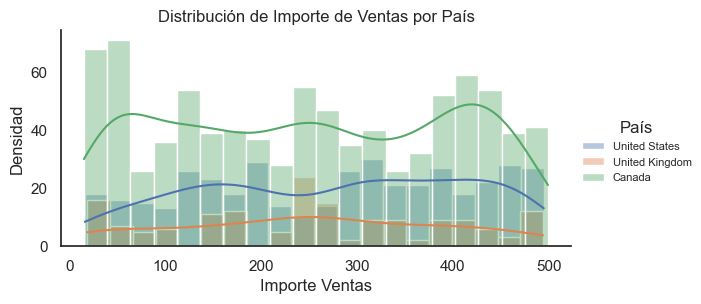

In [39]:
# Crear FacetGrid con todos los datos en una sola faceta
g = sns.FacetGrid(df_ventas, hue="country_x", aspect=2)

# Graficar las distribuciones de importe ventas por país
g.map(sns.histplot, "amount", bins=20, alpha=0.4, kde=True)

# Ajustes de leyenda y etiquetas
g.add_legend(title="País", fontsize=8)
plt.xlabel("Importe Ventas")
plt.ylabel("Densidad")
plt.title("Distribución de Importe de Ventas por País")
plt.show()